In [4]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

# MNIST 기초

- inverse를 통한 mnist 학습
- 신경망을 통한 mnist 학습
- cnn통한 mnist 학습 
- fashon mnist, fast db 학습
- web 연동(한글, 스케치 인식)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

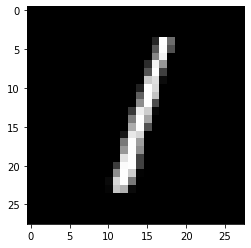

In [6]:
print(X_train.shape)
plt.imshow(X_train[2], cmap='gray')
print(X_test.shape)
plt.imshow(X_test[2], cmap='gray')
print(X_test[2])
print(y_train.shape)
print(y_train)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


원핫 인코딩

In [7]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬을 이용한 학습

y = wx + b  

1 = w2.3 + b*1  -> 2.3  1  [w   = [1  
6 = w1.5 + b*1  -> 1.5  1   b]     6]  

역행렬만 구해주면 됨.  

- y = W x .[x 1].
- A 60000 X 785(=784 + 1)  
- W = int(A) * y  , where Y = 60000*10, W= 785X 10
                                              2x 1
- predict ([x 1] * W), where x = 1x784 w=785x10  , 1x10



In [12]:
A = np.hstack(((X_train, np.ones((60000, 1))) ))

In [14]:
A.shape

(60000, 785)

In [15]:
%%time
W = np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247215e-17
  -9.68761667e-17  2.74183832e-17]
 [ 6.37351236e-16 -2.76720495e-15 -2.38747509e-15 ...  1.19908305e-15
   1.98622008e-15  1.90420431e-15]
 [ 5.70720542e-15  1.07908655e-14  1.08314732e-14 ... -1.04222601e-14
  -1.36075550e-14 -4.14879462e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
Wall time: 11.4 s


In [17]:
print(W[:,0])

[ 7.44778176e-17  6.37351236e-16  5.70720542e-15 -6.89410182e-15
  1.61921169e-15  6.01081563e-15  1.06678417e-15 -2.35600322e-15
 -1.58289428e-15  5.28664505e-15  1.76241660e-15  3.89576048e-15
  3.02162834e-04  3.88864085e-04 -3.03538959e-04 -1.26474566e-05
 -5.69734437e-15  5.74454725e-15  8.25712682e-16  3.17557575e-15
 -9.67780512e-16  6.02280294e-15 -1.59623568e-15  3.28759776e-15
 -2.20570217e-15 -1.75501660e-15  3.72004608e-15 -2.80269838e-15
 -9.00127165e-16 -3.07402116e-15  5.85091557e-16  7.15061724e-15
 -7.99728688e-03  2.07102122e-03  2.37473673e-04  4.17736615e-04
  1.25130340e-04  5.21710603e-06  1.07704793e-04  2.28418868e-04
 -1.42711146e-04  5.35057295e-04 -3.19725195e-04  1.21111359e-04
  3.70121319e-07  1.51179376e-04 -1.21512767e-04  3.00575592e-05
  1.67712928e-04 -2.78002180e-04  4.66517424e-04  7.11096870e-05
  1.78253451e-15 -5.74546886e-15  3.12809877e-15  1.83356068e-15
 -2.18639760e-15  3.36444272e-15 -1.63857575e-02  1.91555200e-02
  1.04795930e-03 -1.56986

In [25]:
T = np.hstack((X_test, np.ones((10000, 1)) ))
p = np.matmul(T, W)
print(p.shape)

(10000, 10)


샘플 하나에 10개의 클래스가 나옴.

argmax를 통해 최대값을 가져옴

In [26]:
p = np.argmax(p, axis = 1)
print(p.shape)
print(p)

(10000,)
[7 2 1 ... 4 5 6]


In [23]:
a = np.array([[1,2,3], 
              [7,8,9], 
              [4,5,6]])
print(np.argmax(a))
print(np.argmax(a, axis=1)) #각각의 행에서 최대값의 index를 출력
print(np.argmax(a, axis=0)) #각각의 컬럼에서 최대값의 index를 출력

5
[2 2 2]
[1 1 1]


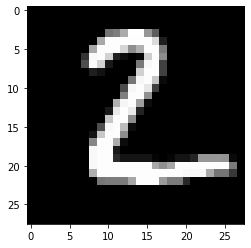

In [29]:
plt.imshow(X_test[1, :].reshape(28,28), cmap="gray")

In [31]:
# 인식률 조사
np.mean(p == y_test) # 1 0 1 0 -> 50%, so 평균하면 됨

0.8603

바이어스에 대한 이야기  

바이어스를 뺴면 원점을 지나는 직선을 구하게 된다.  

데이터들이 원점 근처에 있으면 크게 차이 안날 수도 있지만  

일반적이지 않다. 

## 이것을 히든 레이어가 없는 신경망으로 풀어보자

퍼셉트론

In [43]:
model = Sequential()
model.add(Dense(10, activation='softmax')) # 출력층 10개, 활성함수 softmax -> 확률값으로 해석하기 위해
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.1 0.9 1.2    
# -> 
# 0.1/(0.1+0.9+1.2) #정규화
# exp(0.1) / (exp(0.1) + exp(0.9) + exp(1.2))  지수로그 + 정규화 -> 소프트맥스
# 작은것은 더 작게하고 큰것은 더 크게하자라는 발상

In [44]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                epochs = 10, 
                verbose = 1, # 로그를 축약
                batch_size=32) # 32개씩 랜덤하게 뽑음


Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 9.4673 - accuracy: 0.8428
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 6.0102 - accuracy: 0.8791
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 5.5454 - accuracy: 0.8834
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 5.4931 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 5.4219 - accuracy: 0.8873
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 5.3601 - accuracy: 0.8875
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 5.2586 - accuracy: 0.8879
Epoch 8/10
60000/60000 [==============================] - 3s 55us/step - loss: 5.1811 - accuracy: 0.8907
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 5.2502 - accuracy: 0.8899
Epoch 10/10
60000/60000 [==============================

In [45]:
# 인식률 계산
score = model.evaluate(X_test, y_test_e, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.25394210351166
Test accuracy: 0.9042999744415283


In [46]:
# 예측
p = model.predict(X_test)
print(p.shape)
p = np.argmax(p, axis=1)
print(np.mean(p == y_test))

(10000, 10)
0.9043


In [47]:
print(p[0])

7


In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


784차원 + 1 : 분류기당 785개 * 10 분류기 = 7850  

input dim 784 * 10 + bias 10

In [4]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu')) # 첫번째 레이어에만 input_dim 명시
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


input size * 뉴런 수 + 뉴런 수  

layer 1 = 784 * 5 + 5 = 3925  
layer 2 = 5 * 10 + 10 = 60  

784차원을 5차원으로 줄여 너무 줄임  



In [9]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                epochs = 30, 
                verbose = 1, # 로그를 축약
                batch_size=100) # 32개씩 랜덤하게 뽑음
# 이미 10번 했으면 epochs에 100 하면 사실상 110번 이미 한 것에 추가

Epoch 1/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.2177 - accuracy: 0.9432
Epoch 2/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.1651 - accuracy: 0.9545
Epoch 3/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.1472 - accuracy: 0.9584
Epoch 4/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1350 - accuracy: 0.9621
Epoch 5/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.1288 - accuracy: 0.9633
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1281 - accuracy: 0.9644
Epoch 7/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1236 - accuracy: 0.9666
Epoch 8/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1204 - accuracy: 0.9668
Epoch 9/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1231 - accuracy: 0.9664
Epoch 10/30
60000/60000 [==============================

In [10]:
# 인식률 계산
score = model.evaluate(X_test, y_test_e, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.33849329506664944
Test accuracy: 0.9588000178337097


## 정규화
---

input 데이터를 정규화 하지 않는것은 성능에 영향을 미침  


In [11]:
print(X_train[0, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

신경망에서 이것이 중요한 이유는 이게 값이 크면 가중치를 구하기가 쉽지 않다.  

그래서 정규화를 해줘야한다.  
영상은 무조건 해줘야된다고 생각해라


In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                epochs = 30, 
                verbose = 1, # 로그를 축약
                batch_size=100) # 32개씩 랜덤하게 뽑음
# 이미 10번 했으면 epochs에 100 하면 사실상 110번 이미 한 것에 추가

Epoch 1/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.3769 - accuracy: 0.8825
Epoch 2/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.1161 - accuracy: 0.9665 0s - loss:
Epoch 3/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0863 - accuracy: 0.9750
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0685 - accuracy: 0.9802
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0565 - accuracy: 0.9834
Epoch 6/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0466 - accuracy: 0.9866
Epoch 7/30
60000/60000 [==============================] - 4s 58us/step - loss: 0.0393 - accuracy: 0.9887
Epoch 8/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0334 - accuracy: 0.9908
Epoch 9/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0286 - accuracy: 0.9924
Epoch 10/30
60000/60000 [===================

정규화 시키면 수렴의 속도가 빨라지는 것을 볼 수 있다.

사진 -> 2D 신경망 -> 필터 학습 -> 신경망  

## 컨볼루션 신경망 구조

입력이미지 -> 컨볼루션 계층 -> 풀링 계층 -> 다층 신경망 계층

# CNN
---

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 60000 x 28 x 28  -> 60000 x 28 x 28 x 1
# X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
# X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)

# 정규화
X_train = X_train / 255
X_test = X_test / 255


(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 네트워크 구성

In [3]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters=50,
                kernel_size = (3,3), strides=(1,1), padding='same'))
# sample X 28 X 28 X 50
model.add(Activation('relu')) # softmax는 기울기가 0이 되버리는 문제가 있어 안씀
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam, metrics = ['accuracy'])


In [4]:
model.summary()
# input -> 60000, 28, 28, 1
# layer 1 -> ?, 28, 28, 50(필터수) 
# 파라미터라는 것은 학습해야하는 가중치의 개수이다. 
# 500 -> (커널 size 3*3) * 50(filter 수) + 50(bias)
# 커널할 때는 바이어스가 큰 의미가 없다. 생략 가능하긴 함
# layer dense(256)       2509056 = 9800 * 256 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2509056   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 2,512,126
Trainable params: 2,512,126
Non-trainable params: 0
____________________________________________

약 251만개의 파라미터수를 추정해야 한다.  
CNN은 컨볼루션 계층에서 파라미터를 키우기 때문에 디멘션이 늘어날 수 밖에 없다.  

input -> 60000, 28, 28, 1  
layer 1 -> ?, 28, 28, 50(필터수)   
파라미터라는 것은 학습해야하는 가중치의 개수이다.   
500 -> (커널 size 3*3) * 50(filter 수) + 50(bias)  
커널할 때는 바이어스가 큰 의미가 없다. 생략 가능하긴 함  
layer dense(256)       2509056 = 9800 * 256 + 256  


In [19]:
(9800 * 256 + 256)/ 10

250905.6

In [46]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters=50,
                kernel_size = (3,3), strides=(1,1), padding='same'))
# sample X 28 X 28 X 50
model.add(Activation('relu')) # softmax는 기울기가 0이 되버리는 문제가 있어 안씀
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=30,
                kernel_size = (3,3), strides=(1,1), padding='same'))
# sample X 28 X 28 X 50
model.add(Activation('relu')) # softmax는 기울기가 0이 되버리는 문제가 있어 안씀
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam, metrics = ['accuracy'])


In [47]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 30)        13530     
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 30)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 30)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1470)             

13530 = (3*3)* 50(채널 수) * 30 + 30  
이미지 한장당 필터가 존재하는 것을 생각  

보면 CNN 단에서의 파라미터는 이미지의 크기와는 상관이없다.  

마지막 출력되는 영상의 크기 (None, 7, 7, 30)  



In [49]:
(3*3)*50 * 30 + 30

13530

---


In [50]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters=50,
                kernel_size = (3,3), strides=(1,1), padding='same'))
# sample X 28 X 28 X 50
model.add(Activation('relu')) # softmax는 기울기가 0이 되버리는 문제가 있어 안씀
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam, metrics = ['accuracy'])


In [52]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                batch_size = 100,
                validation_split = 0.2, epochs = 10, verbose = 1) 


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0689 - accuracy: 0.9797 - val_loss: 0.0641 - val_accuracy: 0.9805
Epoch 2/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0543 - val_accuracy: 0.9841
Epoch 3/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 4/10
48000/48000 [==============================] - 67s 1ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 5/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0576 - val_accuracy: 0.9847
Epoch 6/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0535 - val_accuracy: 0.9860
Epoch 7/10
48000/48000 [==============================] - 63s 1ms/st

In [53]:
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9869999885559082


모델1

In [5]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)             

In [6]:
history = model.fit(X_train, y_train_e, 
                    batch_size = 100, epochs = 2, verbose = 1)
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])


Epoch 1/2
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1648 - accuracy: 0.9499
Epoch 2/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0446 - accuracy: 0.9863
Test accuracy: 0.9886000156402588


In [7]:
model.save('mnist_cnn.h5')

In [8]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 30, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 30)         

In [9]:
history = model.fit(X_train, y_train_e, 
                    batch_size = 100, epochs = 1, verbose = 1)

Epoch 1/1
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2363 - accuracy: 0.9281


In [10]:
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9800999760627747


In [11]:
model.save('mnist_cnn_tiny.h5')

In [2]:
from keras.models import load_model
model = load_model('mnist_cnn.h5')

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)             

[[2.3219467e-07 9.9969041e-01 2.4537053e-08 2.4274223e-09 2.2979428e-04
  2.0367984e-06 5.6388639e-05 9.1706903e-07 2.0118532e-05 6.8794741e-08]]
1


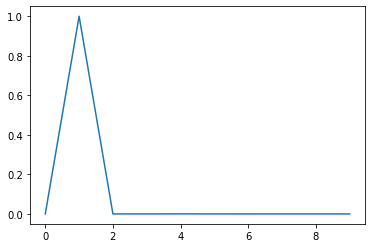

In [40]:
# 4차원으로 넣어주어야함
import cv2
img = cv2.imread('mnist_test/1_2.png', 0) / 255
img = img.reshape(1, 28, 28, 1)

p = model.predict(img)
print(p)
print(np.argmax(p))
plt.plot(p[0])

In [42]:
model = load_model('mnist_cnn_tiny.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 30)         

[[4.6685338e-07 7.2600401e-06 9.9775273e-01 4.1357352e-04 7.0739337e-10
  4.1648100e-08 7.1301458e-11 1.4702983e-06 1.8245631e-03 2.2671122e-08]]
2


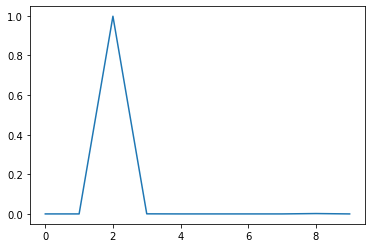

In [47]:
img = cv2.imread('mnist_test/2_2.png', 0) / 255
img = img.reshape(1, 28, 28, 1)

p = model.predict(img)
print(p)
print(np.argmax(p))
plt.plot(p[0])

# 한글인식
---


In [1]:
from keras.models import load_model
model = load_model('hand_written_korean_classification.hdf5')

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

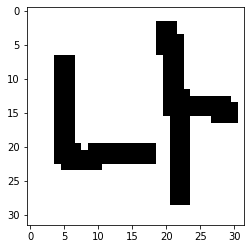

In [5]:
import cv2

image = cv2.imread('mnist_test/na.png')
image = (255 - image) / 255
plt.imshow(image)
# p = model.predict()

In [6]:
image = image.reshape(1, 32, 32, 3)
p = model.predict(image)
p = np.argmax(p)
print(p)

125


In [7]:
import io
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().split()
label = [str for str in labels_file]
label[p]

'나'